<a href="https://colab.research.google.com/github/divyansh-tripathi7/ml_ps/blob/main/SalaryKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import files 
uploaded = files.upload()

Saving salary2.csv to salary2.csv


In [4]:
dataset = pd.read_csv('salary2.csv')

In [5]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  sex  hours.per.week  income
0   90              9    1              40       0
1   82              9    1              18       0
2   66             10    1              40       0
3   54              4    1              40       0
4   41             10    1              40       0


In [6]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values
X
Y

array([0, 0, 0, ..., 1, 0, 0])

In [7]:
X

array([[90,  9,  1, 40],
       [82,  9,  1, 18],
       [66, 10,  1, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  1, 40],
       [22,  9,  0, 20]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Text(0, 0.5, 'Mean Error')

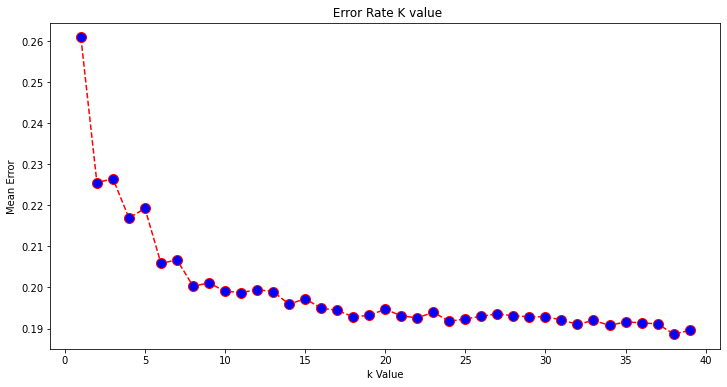

In [10]:
# finding k value 
error = []
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt 

#calc error for k value btw 1 and 40
for i in range(1,40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, Y_train )
  pred_i = model.predict(X_test)
  error.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color = 'red', linestyle='dashed', marker ='o', markerfacecolor = 'blue', markersize =10)
plt.title(' Error Rate K value')
plt.xlabel('k Value')
plt.ylabel('Mean Error')


In [23]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 38, metric = 'minkowski', p =2)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=38)

In [19]:
age = int(input(" enter employes age:  "))
edu = int(input("enter edu level of employee:  "))
sex = int(input("enter gender 1 female 0 male :  "))
wh = int (input("enter employees hours per week :  "))
newEmp = [[age ,edu,sex , wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print(" employee got salary above 50k ")
else :
  print(" customer might not get salary above 50k ")
  

 enter employes age:  99
enter edu level of employee:  9
enter gender 1 female 0 male :  0
enter employees hours per week :  99
[0]
 customer might not get salary above 50k 


In [24]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)

print("confusion matrix :  ")
print(cm)

print("accuracy of the model : {0}%".format(accuracy_score(Y_test, y_pred)*100))


confusion matrix :  
[[5768  429]
 [1107  837]]
accuracy of the model : 81.13253900012283%
